<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/LR-kNN-NB-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)

In [10]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [11]:
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [12]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

# **Logistic Regression**

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.873
Precision: 0.625
Recall: 0.11278195488721804


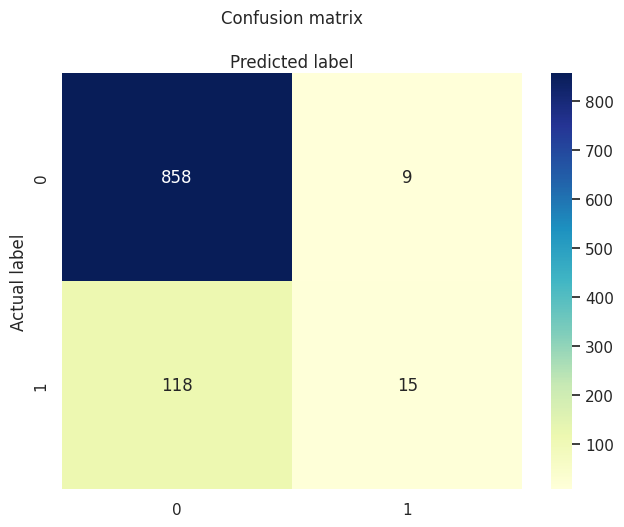

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
eval(y_test,y_pred)

In [ ]:
#To get the coeffient
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.330509
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2314
Method:                           MLE   Df Model:                           18
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2182
Time:                        03:39:12   Log-Likelihood:                -771.08
converged:                       True   LL-Null:                       -986.27
Covariance Type:            nonrobust   LLR p-value:                 4.144e-80
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.7729      1.278     -7.648      0.000     -12.277      

A) Which variables are significantly diffrent than 0  at 5% significant level?

Hypothesis  HO: Coeffienct is 0
            HA: Coeffient is different than 0
If alpha is smaller than significance level(5%), reject Ho and coeffient is different than 0.
If alpha is grater than significance level(5%),fail to reject Ho and 
coeffient is not different than 0.

International plan , voice mail plan, Total intl calls, Customer service calls 
have alpha value less than 0.05. For that resaon, coeffient is different than 0.


B)Among signicant variables, which one increases the probability of churn?

   ln(p/(1-p))=B+B1X1+B2X2+B3X3
   p is probability of success(1). In our case 1 is churn.
   If coeffient is positive(negative), it increases(decreases) the likelihood ratio and churn probability.
   International plan , voice mail plan,Customer service calls (Total intl calls) have positive(negative coeffient) and it increases(decreases) likelihood of churn.


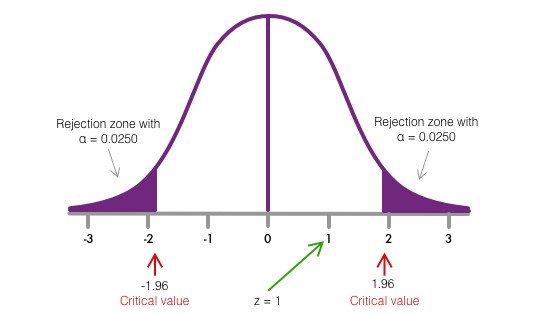

## **K-Nearest Neighbour- kNN**

Accuracy: 0.868
Precision: 0.5072463768115942
Recall: 0.2631578947368421


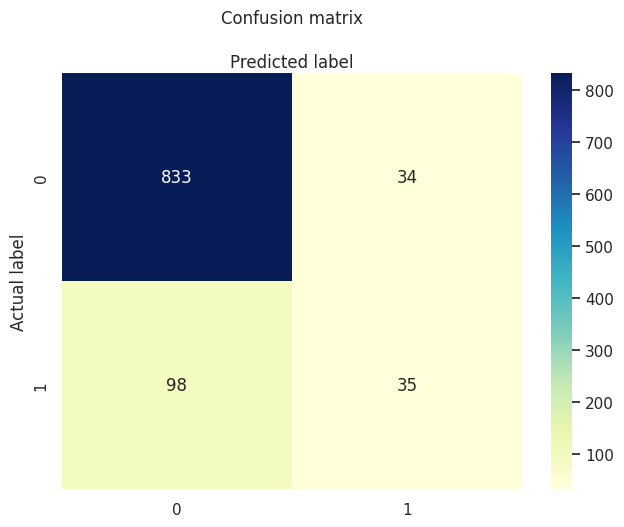

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
# fit the model with data
knn3.fit(X_train,y_train)

#
y_predKNN3=knn3.predict(X_test)
from sklearn import metrics

eval(y_test,y_predKNN3)

## **Choose k Based On CV**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_params = {"n_neighbors": range(1,20)}

knn_grid = GridSearchCV(knn, knn_params, cv=3)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 11}

Accuracy: 0.883
Precision: 0.7222222222222222
Recall: 0.19548872180451127


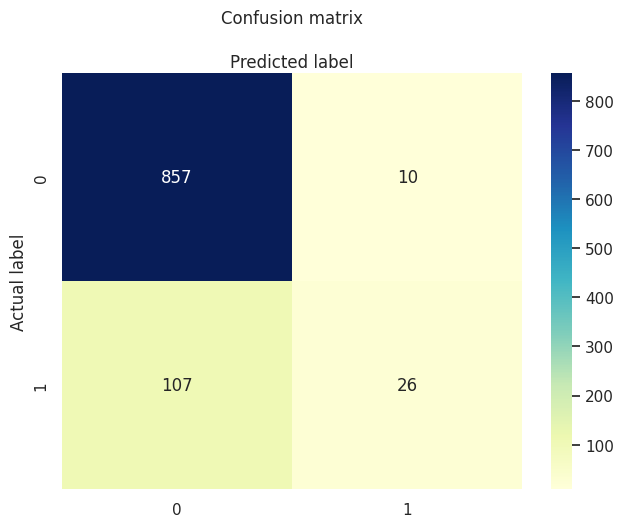

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knncv = KNeighborsClassifier(**knn_grid.best_params_)
# fit the model with data
knncv.fit(X_train,y_train)
#
y_predknncv=knncv.predict(X_test)
eval(y_test,y_predknncv)


# **Naive Bayes**

Accuracy: 0.863
Precision: 0.4864864864864865
Recall: 0.5413533834586466


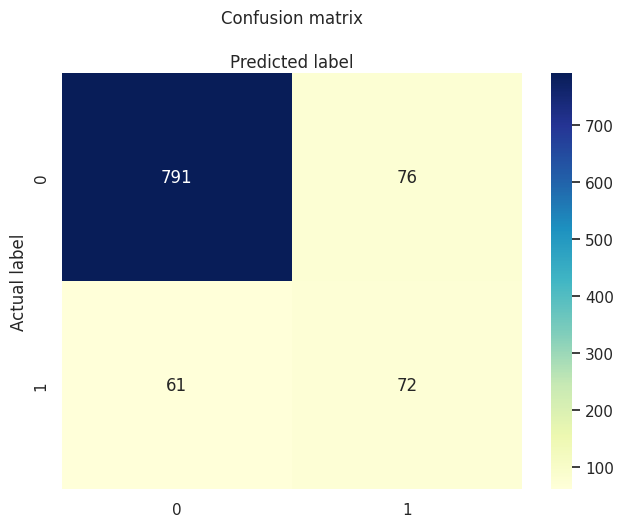

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
y_predNB=model.predict(X_test)
eval(y_test,y_predNB)

# **SVM with default parameters**

Accuracy: 0.867
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


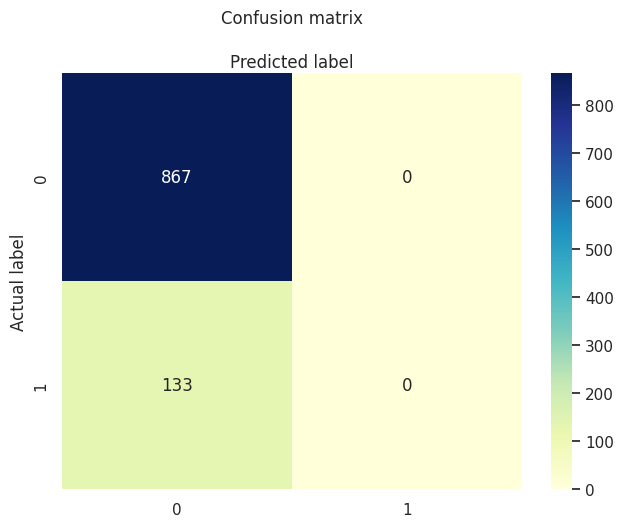

In [ ]:
from sklearn.svm import SVC 
sv =SVC()
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

In [13]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Support Vector with Parameter Optimization**

It takes too much time to optimize

In [ ]:
from sklearn.svm import SVC 
import optuna as op
from sklearn.metrics import accuracy_score
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train, y_train, test_size=0.3, random_state=17
) 
def objective(trial):

   kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
   c=trial.suggest_float("C",0.1,3.0,log=True)
   gamma=trial.suggest_categorical('gamma',['auto','scale'])
   degree=trial.suggest_int("degree",1,3,log=True)
   model =SVC(kernel=kernel,gamma=gamma,degree=degree,C=c)
   model.fit(X_train2,y_train2)
   accuracy = accuracy_score(model.predict(X_test2),y_test2)
   return accuracy
#optuna study record
study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=5,n_jobs=-1)
print(study.best_trials)

[I 2023-03-30 03:53:16,850] A new study created in memory with name: no-name-27af9730-f40c-4d5b-8cca-79e324a235cb
[I 2023-03-30 03:53:17,220] Trial 1 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.32164244367819006, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,011] Trial 2 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.39402154474980317, 'gamma': 'auto', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,187] Trial 3 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.10482982035014193, 'gamma': 'auto', 'degree': 3}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,563] Trial 4 finished with value: 0.8528571428571429 and parameters: {'kernel': 'rbf', 'C': 1.0458944777779748, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30

[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.8528571428571429], datetime_start=datetime.datetime(2023, 3, 30, 3, 53, 16, 860476), datetime_complete=datetime.datetime(2023, 3, 30, 3, 54, 30, 952932), params={'kernel': 'linear', 'C': 1.1850790159628448, 'gamma': 'auto', 'degree': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('rbf', 'poly', 'linear', 'sigmoid')), 'C': FloatDistribution(high=3.0, log=True, low=0.1, step=None), 'gamma': CategoricalDistribution(choices=('auto', 'scale')), 'degree': IntDistribution(high=3, log=True, low=1, step=1)}, trial_id=0, value=None), FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.8528571428571429], datetime_start=datetime.datetime(2023, 3, 30, 3, 53, 16, 873252), datetime_complete=datetime.datetime(2023, 3, 30, 3, 53, 17, 220316), params={'kernel': 'sigmoid', 'C': 0.32164244367819006, 'gamma': 'scale', 'degree': 1}, user_attrs={}, system_attrs={}, interme

In [ ]:
print(study.best_params)

{'kernel': 'linear', 'C': 2.797224576635671, 'gamma': 'scale', 'degree': 3}


[I 2023-03-30 03:43:09,118] Trial 3 finished with value: 0.8528571428571429 and parameters: {'kernel': 'linear', 'C': 1.718143306950425, 'gamma': 'scale', 'degree': 3}. Best is trial 1 with value: 0.8528571428571429.


Accuracy: 0.878
Precision: 0.6341463414634146
Recall: 0.19548872180451127


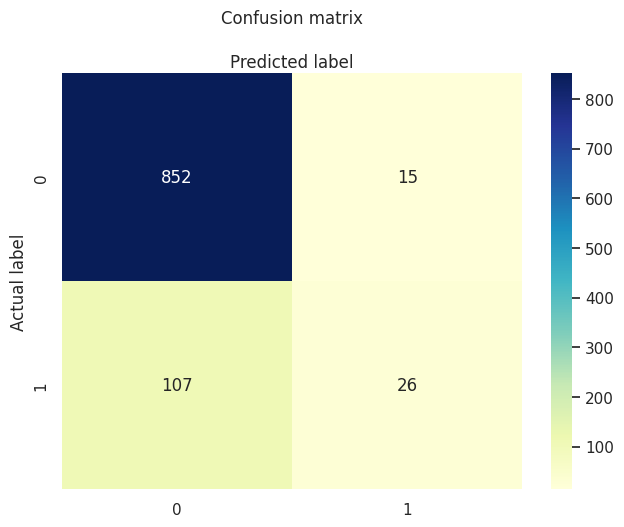

In [ ]:
parameters={'kernel': 'linear', 'C': 2.797224576635671, 'gamma': 'scale', 'degree': 3}
from sklearn.svm import SVC 
sv =SVC(**parameters)
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

## **Boosting**

In [59]:
import optuna

import sklearn.datasets
import sklearn.ensemble

# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):

    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.RandomForestClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = XGBClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = lgb.LGBMClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
       
       
    else:
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()
   
    return accuracy


if __name__ == "__main__":
    l1=0
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)
    print(study.best_trial)
    print(study.best_params)

[I 2023-04-03 22:26:09,287] A new study created in memory with name: no-name-8b11a68f-7c90-4ca5-81b8-105fa49a6580
[I 2023-04-03 22:26:12,314] Trial 0 finished with value: 0.9412765685259258 and parameters: {'classifier': 'Random Forest', 'max_depth': 9, 'max_features': 18}. Best is trial 0 with value: 0.9412765685259258.
[I 2023-04-03 22:26:13,031] Trial 1 finished with value: 0.8641199039656624 and parameters: {'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 4}. Best is trial 0 with value: 0.9412765685259258.
[I 2023-04-03 22:26:14,249] Trial 2 finished with value: 0.9507063067474378 and parameters: {'classifier': 'XGBoost', 'max_depth': 14, 'max_features': 18}. Best is trial 2 with value: 0.9507063067474378.
[I 2023-04-03 22:26:15,822] Trial 3 finished with value: 0.9507063067474378 and parameters: {'classifier': 'XGBoost', 'max_depth': 14, 'max_features': 16}. Best is trial 2 with value: 0.9507063067474378.
[I 2023-04-03 22:26:18,856] Trial 4 finished with value: 0.94

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[0.9524239627067391], datetime_start=datetime.datetime(2023, 4, 3, 22, 26, 53, 904706), datetime_complete=datetime.datetime(2023, 4, 3, 22, 26, 54, 376613), params={'classifier': 'LightGBM', 'max_depth': 18, 'max_features': 12}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntDistribution(high=18, log=False, low=2, step=1), 'max_features': IntDistribution(high=18, log=False, low=2, step=1)}, trial_id=17, value=None)
{'classifier': 'LightGBM', 'max_depth': 18, 'max_features': 12}


[LightGBM] [Warning] Unknown parameter: max_features
Accuracy: 0.958
Precision: 0.941747572815534
Recall: 0.7293233082706767


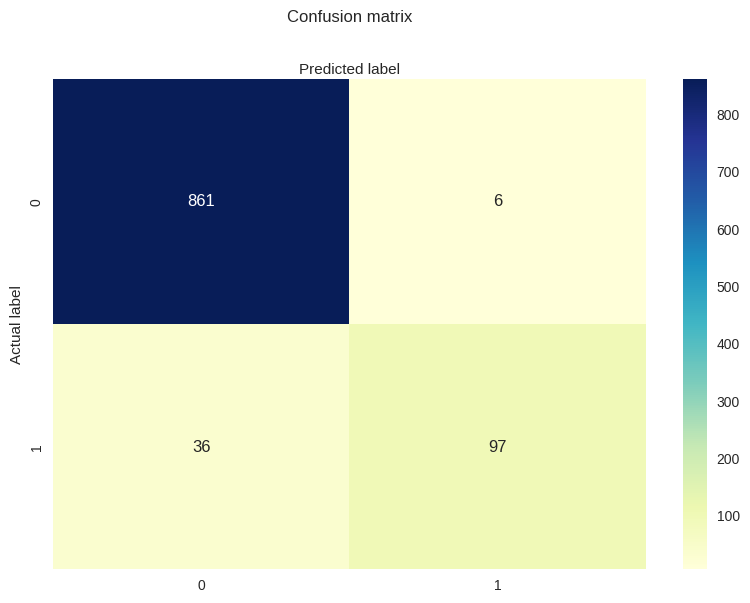

In [60]:
params={ 'max_features': 18,'max_depth': 12 }
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=17,**params)
lgbm.fit(X_train, y_train)
# make predictions for test data
y_predlgbm = lgbm.predict(X_test)
eval(y_test, y_predlgbm)

### Automatic Machnile Learning (Auto ML)

In [17]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 20.3 MB/s eta 0:00:00


In [21]:
result = pd.concat([X_train, y_train], axis=1)
result

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1069,22,510,0,1,0,160.4,108,27.27,218.1,88,18.54,192.9,115,8.68,12.5,4,3.38,1,0
1582,86,510,0,1,0,150.5,92,25.59,120.3,95,10.23,271.2,96,12.20,9.0,2,2.43,1,0
2444,121,415,0,0,31,263.1,70,44.73,279.3,118,23.74,127.1,143,5.72,9.7,4,2.62,5,0
3196,124,510,0,1,0,169.3,108,28.78,178.6,91,15.18,242.3,82,10.90,12.2,3,3.29,1,0
267,119,408,0,1,0,138.3,89,23.51,170.5,78,14.49,263.9,98,11.88,13.5,6,3.65,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,21,415,0,1,0,146.0,78,24.82,109.7,79,9.32,247.4,108,11.13,6.8,7,1.84,0,0
1414,182,415,0,1,0,176.1,90,29.94,174.9,106,14.87,234.7,134,10.56,9.7,4,2.62,1,0
2191,113,415,0,1,0,90.6,130,15.40,170.6,100,14.50,137.4,74,6.18,5.4,9,1.46,1,0
3313,127,408,0,1,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1,0


In [35]:
#!pip install --upgrade numpy
from pycaret.classification import *
s = setup(data = result, target = 'Churn', session_id=123,fold=5)


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(2333, 19)"
4,Transformed data shape,"(2333, 19)"
5,Transformed train set shape,"(1633, 19)"
6,Transformed test set shape,"(700, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9528,0.9129,0.7633,0.9089,0.8287,0.8016,0.8064,0.4700
xgboost,Extreme Gradient Boosting,0.9504,0.9097,0.7592,0.8952,0.8209,0.7924,0.7964,0.7100
gbc,Gradient Boosting Classifier,0.9473,0.9147,0.7388,0.8933,0.8072,0.7771,0.7827,1.0500
rf,Random Forest Classifier,0.9406,0.9208,0.6653,0.9165,0.7686,0.7357,0.7495,1.5820
et,Extra Trees Classifier,0.9259,0.9182,0.5306,0.9559,0.6811,0.6433,0.6796,1.7140
dt,Decision Tree Classifier,0.9057,0.8202,0.6980,0.6853,0.6891,0.6337,0.6353,0.1820
knn,K Neighbors Classifier,0.8671,0.6927,0.2571,0.6495,0.3668,0.3078,0.3501,0.5900
qda,Quadratic Discriminant Analysis,0.8659,0.8494,0.5102,0.5623,0.5339,0.4559,0.4573,0.2940
ada,Ada Boost Classifier,0.8653,0.8449,0.3755,0.5813,0.4545,0.3819,0.3947,0.7120
nb,Naive Bayes,0.8610,0.8408,0.5388,0.5407,0.5379,0.4563,0.4574,0.1480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [37]:
tuned2 = tune_model(best_model)
tuned_predictions = predict_model(tuned2, data=X_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8869,0.9138,0.4898,0.6667,0.5647,0.5014,0.5093
1,0.8991,0.8727,0.5306,0.7222,0.6118,0.5553,0.5640
2,0.9205,0.9146,0.5510,0.8710,0.6750,0.6323,0.6538
3,0.8988,0.8850,0.4286,0.8077,0.5600,0.5088,0.5415
4,0.9172,0.8826,0.6939,0.7391,0.7158,0.6674,0.6678
Mean,0.9045,0.8938,0.5388,0.7613,0.6255,0.5730,0.5873
Std,0.0126,0.0172,0.0881,0.0709,0.0613,0.0663,0.0627


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [38]:
tuned_predictions.head()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,prediction_label,prediction_score
1687,90,415,0,1,0,37.799999,80,6.430000,155.300003,105,13.200000,175.000000,111,7.88,14.2,5,3.83,3,0,0.9993
877,129,415,1,1,0,267.399994,78,45.459999,204.199997,85,17.360001,111.699997,146,5.03,5.9,4,1.59,1,0,0.8340
1311,90,415,0,1,0,200.899994,92,34.150002,164.300003,91,13.970000,249.000000,98,11.21,8.9,7,2.40,1,0,0.9998
2151,72,415,0,1,0,137.600006,106,23.389999,143.500000,94,12.200000,273.700012,110,12.32,9.6,6,2.59,2,0,0.9976
961,97,408,0,1,0,217.600006,81,36.990002,320.500000,51,27.240000,150.699997,110,6.78,4.2,3,1.13,0,0,0.9952


Accuracy: 0.956
Precision: 0.9494949494949495
Recall: 0.706766917293233


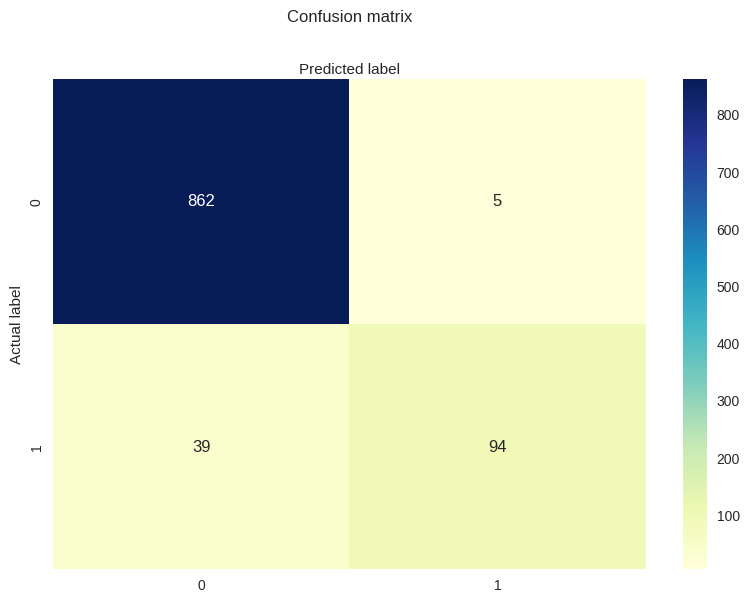

In [39]:
eval(y_test,tuned_predictions['prediction_label'])

In [41]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 845.1 kB/s eta 0:00:00
     ━━━━━━━━━━━

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor 
predictor= TabularPredictor(label ='Churn').fit(train_data =result, verbosity = 2)

No path specified. Models will be saved in: "AutogluonModels/ag-20230403_214246/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230403_214246/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    2333
Train Data Columns: 18
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12357.6 MB
	Train Data (Original)  M

Accuracy: 0.954
Precision: 0.9484536082474226
Recall: 0.6917293233082706


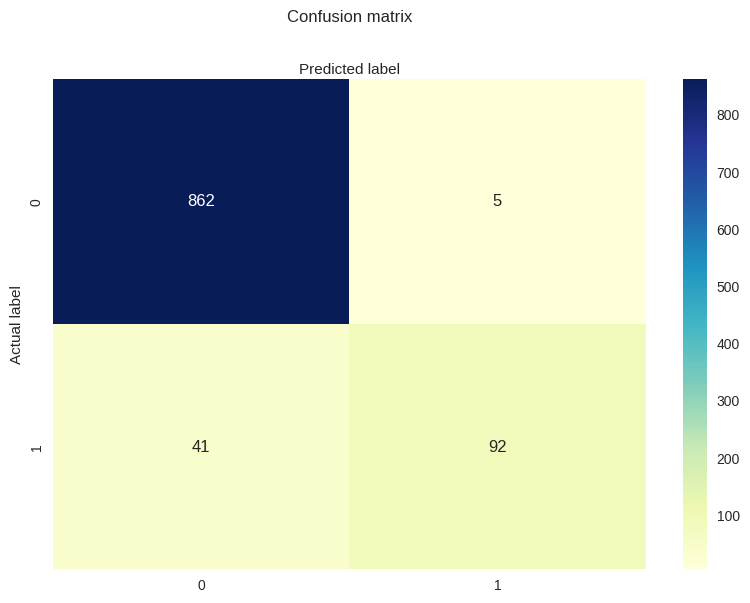

In [44]:
y_pred = predictor.predict(X_test)
#y_pred=pd.DataFrame(y_pred,columns=['stroke'])
eval(y_test,y_pred)

In [45]:
predictor.leaderboard(result, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.993571,0.967880,0.178064,0.041359,3.663990,0.178064,0.041359,3.663990,1,True,4
1,LightGBMLarge,0.993571,0.967880,0.624671,0.177358,7.247226,0.624671,0.177358,7.247226,1,True,13
2,XGBoost,0.992713,0.963597,0.216880,0.076730,3.394251,0.216880,0.076730,3.394251,1,True,11
3,RandomForestGini,0.992285,0.961456,0.594017,0.194501,4.110539,0.594017,0.194501,4.110539,1,True,5
4,RandomForestEntr,0.990999,0.955032,0.629503,0.331810,6.544492,0.629503,0.331810,6.544492,1,True,6
5,ExtraTreesGini,0.986284,0.931478,0.602298,0.229358,2.398358,0.602298,0.229358,2.398358,1,True,8
6,ExtraTreesEntr,0.985855,0.929336,0.767409,0.178855,2.503234,0.767409,0.178855,2.503234,1,True,9
7,WeightedEnsemble_L2,0.978140,0.974304,0.357237,0.105055,23.091160,0.018177,0.009002,7.865828,2,True,14
8,LightGBMXT,0.974711,0.965739,0.146888,0.036859,2.478798,0.146888,0.036859,2.478798,1,True,3
9,KNeighborsDist,0.974282,0.871520,0.121084,0.057734,0.109874,0.121084,0.057734,0.109874,1,True,2


In [46]:
predictor.feature_importance(data=result)

Computing feature importance via permutation shuffling for 18 features using 2333 rows with 5 shuffle sets...
	39.67s	= Expected runtime (7.93s per shuffle set)
	25.81s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Total day minutes,0.075011,0.003306,4.517923e-07,5,0.081818,0.068203
Customer service calls,0.061209,0.004386,3.141915e-06,5,0.070239,0.052178
International plan,0.051007,0.002122,3.583640e-07,5,0.055376,0.046639
Total day charge,0.035148,0.002625,3.704809e-06,5,0.040552,0.029743
Total eve minutes,0.033005,0.000909,6.905641e-08,5,0.034877,0.031133
Total intl calls,0.025975,0.001118,4.104281e-07,5,0.028277,0.023674
Total intl minutes,0.016374,0.001528,8.984881e-06,5,0.019519,0.013229
Voice mail plan,0.013373,0.002488,1.374160e-04,5,0.018497,0.008250
Total eve charge,0.010459,0.001731,8.675759e-05,5,0.014022,0.006895
Number vmail messages,0.006429,0.001174,1.276084e-04,5,0.008846,0.004012


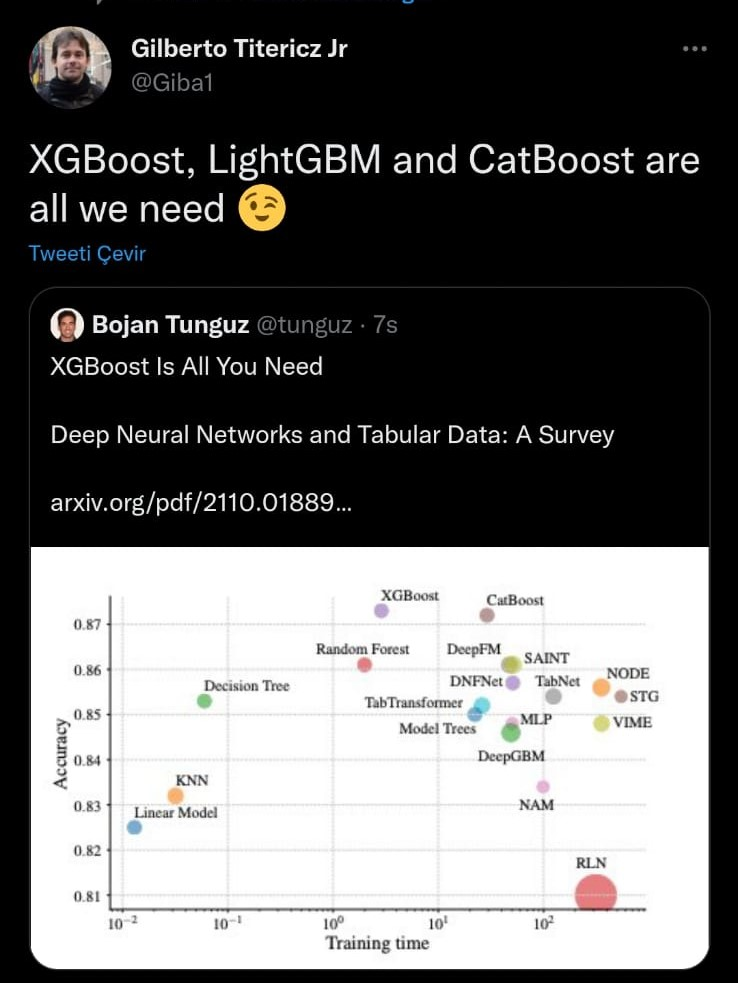

For further reference:

https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
